<a href="https://colab.research.google.com/github/imjoung/DataScience/blob/main/ml/16_%ED%8C%8C%EB%A7%88%EC%A1%B1_%EC%9D%B8%EB%94%94%EC%96%B8_%EB%8B%B9%EB%87%A8%EB%B3%91_%EB%B0%9C%EB%B3%91_%EC%9C%A0%EB%AC%B4%EB%A5%BC_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파마족 인디언 당뇨병 발병 유무를 예측하는 이진 분류 문제 (1:당뇨병, 0:정상)

데이터 준비하기

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

#랜덤 시드 고정시키기
np.random.seed(5)


In [ ]:
dataset = np.loadtxt('/content/diabetes.csv', delimiter=',',skiprows=1)
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
X_train = dataset[:700,0:8]
y_train = dataset[:700,8]
X_test = dataset[700:,0:8]
y_test = dataset[700:,8]

모델 구성하기

In [ ]:

model = Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

모델 학습시키기

In [ ]:

history = model.fit(X_train,y_train,
                    epochs=1500,
                    batch_size=64)


Epoch 1/1500
11/11 [==============================] - 14s 2ms/step - loss: 74.6583 - accuracy: 0.3365
Epoch 2/1500
11/11 [==============================] - 0s 2ms/step - loss: 59.1461 - accuracy: 0.3437
Epoch 3/1500
11/11 [==============================] - 0s 2ms/step - loss: 48.1411 - accuracy: 0.3625
Epoch 4/1500
11/11 [==============================] - 0s 2ms/step - loss: 33.4327 - accuracy: 0.3631
Epoch 5/1500
11/11 [==============================] - 0s 2ms/step - loss: 21.1383 - accuracy: 0.3258
Epoch 6/1500
11/11 [==============================] - 0s 4ms/step - loss: 11.0301 - accuracy: 0.3845
Epoch 7/1500
11/11 [==============================] - 0s 2ms/step - loss: 4.7361 - accuracy: 0.5230
Epoch 8/1500
11/11 [==============================] - 0s 2ms/step - loss: 3.4721 - accuracy: 0.6173
Epoch 9/1500
11/11 [==============================] - 0s 2ms/step - loss: 3.0389 - accuracy: 0.5865
Epoch 10/1500
11/11 [==============================] - 0s 3ms/step - loss: 2.5962 - accuracy:

학습 결과 그려보기

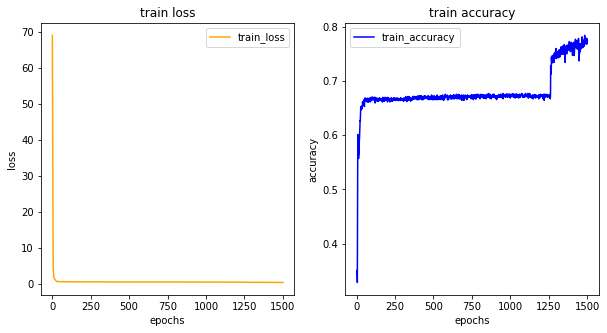

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

모델 평가하기

In [ ]:
scores = model.evaluate(X_test,y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

3/3 [==============================] - 1s 4ms/step - loss: 0.5640 - accuracy: 0.7500
accuracy: 75.00%


모델 성능평가

In [ ]:
def plot_auc_roc(model):
    probs = model.predict_classes(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [ ]:
# 모델 예측하기
result = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn import metrics
report = metrics.classification_report(y_test,result)
print(report)

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79        41
         1.0       0.68      0.70      0.69        27

    accuracy                           0.75        68
   macro avg       0.74      0.74      0.74        68
weighted avg       0.75      0.75      0.75        68



In [ ]:
print(metrics.precision_score(y_test,result))
print(metrics.recall_score(y_test,result))

0.6785714285714286
0.7037037037037037


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


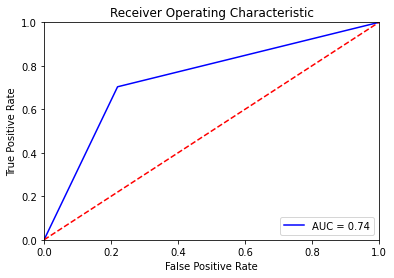

In [ ]:
plot_auc_roc(model)